## To predict the percentage of an student based on the number of study hours.

## Author: Nischal Tiwari

# Task 1

In [1]:
# Importing all libraries required in this task.
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

### Reading the data

In [3]:
df=pd.read_csv('.\Data\student_score.csv')
df.head(10)


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [6]:
df.isna().sum() # To count if there is any null value in the dataframe

Hours     0
Scores    0
dtype: int64

In [5]:
df.describe() #it generate summary statistics for our dataframe

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


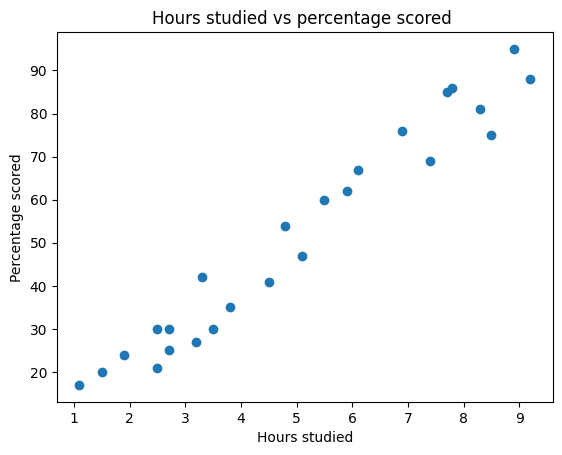

In [8]:
# Plotting the distribution of scores w.r.t the hours studied
plt.scatter(x='Hours', y='Scores', data=df)
plt.xlabel("Hours studied")
plt.ylabel("Percentage scored")
plt.title("Hours studied vs percentage scored ")
plt.show()

### Preparing the data

In [16]:
X = df.loc[:, "Hours"].values.reshape(-1, 1)
Y = df.loc[:, "Scores"].values


In [41]:
# splitting the data into two sets X_train and X_test
from sklearn.model_selection import train_test_split  
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=88) 

In [42]:
X_test.shape

(5, 1)

### Training the algorithm

In [43]:
from sklearn.linear_model import LinearRegression
lreg=LinearRegression()
lreg.fit(X_train,Y_train)
score=lreg.score(X_train,Y_train)
print("The accuracy score is ",score*100,"%")

The accuracy score is  96.39411834033366 %


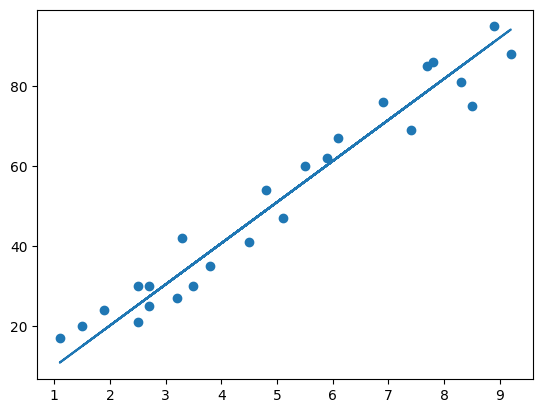

In [46]:
# Plotting the regression line
line = lreg.coef_*X+lreg.intercept_

# Plotting for the test data
plt.scatter(X, Y)
plt.plot(X, line);
plt.show()

### Making Prediction

In [47]:
y_pred=lreg.predict(X_test)
y_pred

array([48.91427902, 33.46311598, 10.80141019, 60.24513192, 87.02714785])

In [60]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': Y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,54,48.914279
1,42,33.463116
2,17,10.801410
3,62,60.245132
4,75,87.027148


In [61]:
# Predicted score if a student studies for 9.25 hrs/ day
hours = 9.20
hours=np.array(hours).reshape(-1,1)
pred = lreg.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(pred))

No of Hours = [[9.2]]
Predicted Score = [94.2376906]


## Evaluation

In [63]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, y_pred)) 
print('R2 score:', metrics.r2_score(Y_test, y_pred)) 

Mean Absolute Error: 6.720642147174479
R2 score: 0.852994164281331
